In [ ]:
import numpy as np
from tensorflow import keras 
from  tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

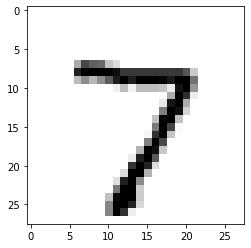

In [ ]:
plt.imshow(x_test[0], cmap='binary')

In [ ]:
y_test[0]

7

Data Pre-Processing 

* Normalize Data
* Dimension Data compatible with model
* Categorisation


In [ ]:
# Normalization

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print(np.shape(x_train))

(60000, 28, 28)


In [ ]:
# Dimension equalization 

x_train = np.expand_dims(x_train, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
# Categorisation
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [ ]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# Convolutif Model

model = keras.Sequential(
    [
     keras.Input(shape=(28,28,1)),
     layers.Conv2D(128,kernel_size=(3,3), activation='relu'),
     layers.MaxPool2D(pool_size=(2,2)),
     layers.Dropout(0.3),
     layers.Conv2D(128,kernel_size=(3,3), activation='relu'),
     layers.MaxPool2D(pool_size=(2,2)),
     layers.Flatten(),
     layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 13, 13, 128)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 11, 11, 128)       147584    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 5, 5, 128)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3200)             

In [ ]:
def scheduler(epoch,lr):
    if epoch == 0:
        return lr 
    else:
        new_lr = lr * tf.math.exp(-0.2)
        return new_lr

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
# Training

batch = 16
epochs = 100

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train, batch_size=batch, callbacks=[lr_scheduler, early_stopping], epochs=epochs, validation_split=0.15)

Epoch 1/100
3188/3188 [==============================] - 27s 8ms/step - loss: 0.1234 - accuracy: 0.9618 - val_loss: 0.0489 - val_accuracy: 0.9858 - lr: 0.0010
Epoch 2/100
3188/3188 [==============================] - 26s 8ms/step - loss: 0.0423 - accuracy: 0.9866 - val_loss: 0.0447 - val_accuracy: 0.9866 - lr: 8.1873e-04
Epoch 3/100
3188/3188 [==============================] - 27s 8ms/step - loss: 0.0277 - accuracy: 0.9910 - val_loss: 0.0424 - val_accuracy: 0.9880 - lr: 6.7032e-04
Epoch 4/100
3188/3188 [==============================] - 26s 8ms/step - loss: 0.0191 - accuracy: 0.9941 - val_loss: 0.0378 - val_accuracy: 0.9898 - lr: 5.4881e-04
Epoch 5/100
3188/3188 [==============================] - 26s 8ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 0.0378 - val_accuracy: 0.9906 - lr: 4.4933e-04
Epoch 6/100
3188/3188 [==============================] - 26s 8ms/step - loss: 0.0082 - accuracy: 0.9975 - val_loss: 0.0373 - val_accuracy: 0.9912 - lr: 3.6788e-04
Epoch 7/100
3188/3188 [===

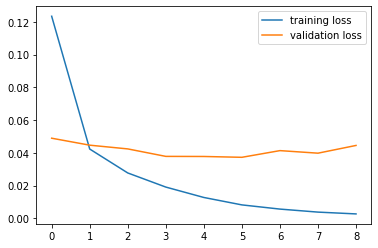

In [ ]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.legend()

In [ ]:
model.evaluate(x_test,y_test,verbose=0)

[0.029723303392529488, 0.9923999905586243]